In [2]:
%%time
cycle_share = pd.read_csv('cycle_share.csv')

<string>:2: DtypeWarning: Columns (21,39) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 6.79 s


In [1]:
%%time
from __future__ import division
from __future__ import print_function

import numpy as np
import scipy as sp
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

from patsy import dmatrix, dmatrices

import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
pd.options.display.max_columns = 100

import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

import collections
from pprint import pprint

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Wall time: 22.1 s



|Feature| Type |Description
|----|----|----|
|trip_id  | ID| 이용 id
|starttime  |  |이용 시작시간
|stoptime  |  |이용 종료시간
|bikeid  | 카테고리| 자전거 id
|tripduration |  연속형| 이용기간(초) 
|from_station_name |카테고리 | 이용시작 정거장 
|to_station_name |카테고리 | 이용 종료 정거장
|from_station_id | 카테고리|    이용시작 정거장 id   
|to_station_id   |카테고리 |  이용 종료 정거장 id
|usertype   | 카테고리| 유저 타입
|gender    | 카테고리| 유저 성별                   
|age    |연속형 | 유저 나이
|Date         | | 이용 시작일자              
|station_id      | 카테고리|  정거장 id             
|name               | 카테고리|  이용시작 정거장          
|lat                   | 연속형 |  위도      
|long                     | 연속형 | 경도     
|install_date                | 카테고리 | 정거장 설치 날짜  
|install_dockcount              | 연속형 | 정거장의 dock 갯수
|modification_date              | | 스테이션이 수정되어 위치 또는 도킹 개수가 변경된 날짜
|current_dockcount             | 연속형 |  160831 기준 각 스테이션의 독 개수
|decommission_date               | | 정거장이 서비스를 종료 한 날짜
|Max_Temperature_F               | 연속형 | 그 날의 최고 온도
|Mean_Temperature_F             |  연속형| 그 날의 평균 온도
|Min_TemperatureF             | 연속형| 그 날의 최저 온도
|Max_Dew_Point_F                 |연속형 | 그 날의 최고 이슬점
|MeanDew_Point_F                |연속형| 그 날의 평균 이슬점
|Min_Dewpoint_F  | 연속형| 그 날의 최저 이슬점
|Max_Humidity       |연속형 |  그 날의 최고 습도         
|Mean_Humidity         | 연속형|  그 날의 평균 습도  
|Min_Humidity             | 연속형|   그 날의 최저 습도    
|Max_Sea_Level_Pressure_In   | 연속형|  그 날의 최고 해수면 높이  
|Mean_Sea_Level_Pressure_In     |연속형 | 그 날의 평균 해수면 높이
|Min_Sea_Level_Pressure_In       |연속형 | 그 날의 최저 해수면 높이
|Max_Visibility_Miles            | 연속형| 그 날의 최고 가시거리(mile)
|Mean_Visibility_Miles           | 연속형| 그 날의 평균 가시거리(mile)
|Min_Visibility_Miles            | 연속형| 그 날의 최저 가시거리(mile)
|Max_Wind_Speed_MPH              |연속형 | 그 날의 최고 풍속
|Mean_Wind_Speed_MPH            | 연속형| 그 날의 평균 풍속
|Max_Gust_Speed_MPH             | 연속형| 그 날의 최고 돌풍
|Precipitation_In                |연속형 | 그 날의 강수량
|Events                         |카테고리 | 그 날의 날씨
|from_station_area  | 카테고리 | 정거장이 존재하는 지역
|day |카테고리| 일 표기 (월요일부터 일요일까지 차례대로 0~6)
|weekend |카테고리| 주말, 평일 표기
|Gender_F |카테고리|여성 여부 표기(더미)
|Gender_M |카테고리|남성 여부 표기(더미)
|Gender_O |카테고리|성별 표기(더미)
|Snow|카테고리| 눈 여부(더미)
|Thunderstorm|카테고리| 천둥 여부(더미)
|Fog|카테고리| 안개 여부(더미)
|Rain|카테고리| 비 여부(더미)

In [6]:
cycle_share.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,age,Date,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,from_station_area,day,weekend,from_station_area[BT],from_station_area[CBD],from_station_area[CD],from_station_area[CH],from_station_area[DPD],from_station_area[EL],from_station_area[FH],from_station_area[ID],from_station_area[PS],from_station_area[SLU],from_station_area[UD],from_station_area[UW],from_station_area[WF],Gender_F,Gender_M,Gender_O,Snow,Thunderstorm,Fog,Rain
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,57.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,47.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,29.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,40.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,46.0,10/13/2014,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,10/13/2014,20.0,11/9/2015,18.0,NaN,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.0,Rain,CBD,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1


### 1. predict tripduration in member

In [3]:
cs_lm_f = cycle_share[cycle_share.usertype == 'Member'][['age', 'Mean_Temperature_F', 'MeanDew_Point_F',  
                                                         'Mean_Humidity', 'Mean_Sea_Level_Pressure_In', 
                                                         'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 
                                                         'Precipitation_In', 'day', 'weekend', 'Gender_F', 
                                                         'Gender_M', 'Gender_O', 'from_station_area[BT]',
                                                         'from_station_area[CBD]', 'from_station_area[CD]',
                                                         'from_station_area[CH]', 'from_station_area[DPD]', 
                                                         'from_station_area[EL]', 'from_station_area[FH]', 
                                                         'from_station_area[ID]', 'from_station_area[PS]',
                                                         'from_station_area[SLU]', 'from_station_area[UD]',
                                                         'from_station_area[UW]', 'from_station_area[WF]',
                                                         'Rain', 'Snow', 'Fog', 'Thunderstorm']]
cs_lm_f.reset_index(inplace = True)
del cs_lm_f['index']

In [4]:
cs_lm_t = cycle_share.tripduration[cycle_share.usertype == 'Member']
cs_lm_t = cs_lm_t.reset_index()
del cs_lm_t['index']

In [5]:
# 잠시만...
cs_lm_t = cs_lm_t[~cs_lm_f.Mean_Temperature_F.isnull()]
cs_lm_t = cs_lm_t[~cs_lm_f.age.isnull()]
cs_lm_t.isnull().sum()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


tripduration    0
dtype: int64

In [6]:
# 잠시만...
cs_lm_f = cs_lm_f[~cs_lm_f.Mean_Temperature_F.isnull()]
cs_lm_f = cs_lm_f[~cs_lm_f.age.isnull()]
cs_lm_f.isnull().sum()

age                           0
Mean_Temperature_F            0
MeanDew_Point_F               0
Mean_Humidity                 0
Mean_Sea_Level_Pressure_In    0
Mean_Visibility_Miles         0
Mean_Wind_Speed_MPH           0
Precipitation_In              0
day                           0
weekend                       0
Gender_F                      0
Gender_M                      0
Gender_O                      0
from_station_area[BT]         0
from_station_area[CBD]        0
from_station_area[CD]         0
from_station_area[CH]         0
from_station_area[DPD]        0
from_station_area[EL]         0
from_station_area[FH]         0
from_station_area[ID]         0
from_station_area[PS]         0
from_station_area[SLU]        0
from_station_area[UD]         0
from_station_area[UW]         0
from_station_area[WF]         0
Rain                          0
Snow                          0
Fog                           0
Thunderstorm                  0
dtype: int64

In [7]:
cs_lm_f.head()

,age,Mean_Temperature_F,MeanDew_Point_F,Mean_Humidity,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,day,weekend,Gender_F,Gender_M,Gender_O,from_station_area[BT],from_station_area[CBD],from_station_area[CD],from_station_area[CH],from_station_area[DPD],from_station_area[EL],from_station_area[FH],from_station_area[ID],from_station_area[PS],from_station_area[SLU],from_station_area[UD],from_station_area[UW],from_station_area[WF],Rain,Snow,Fog,Thunderstorm
0,57.0,62.0,51,68,29.79,10,4,0.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,47.0,62.0,51,68,29.79,10,4,0.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,29.0,62.0,51,68,29.79,10,4,0.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,40.0,62.0,51,68,29.79,10,4,0.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,46.0,62.0,51,68,29.79,10,4,0.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


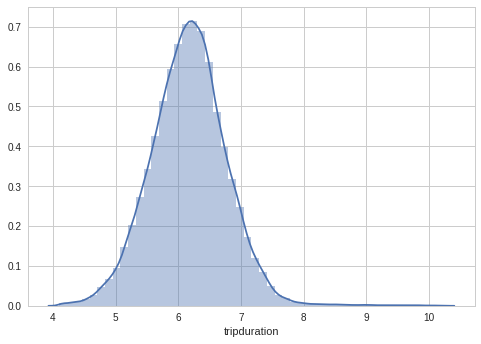

In [12]:
sns.distplot(np.log(cs_lm_t));

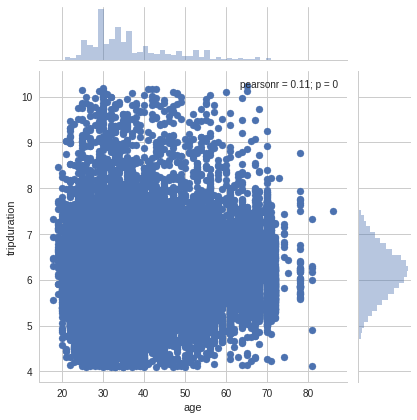

In [22]:
sns.jointplot(x=cs_lm_f.age, y=np.log(cs_lm_t));

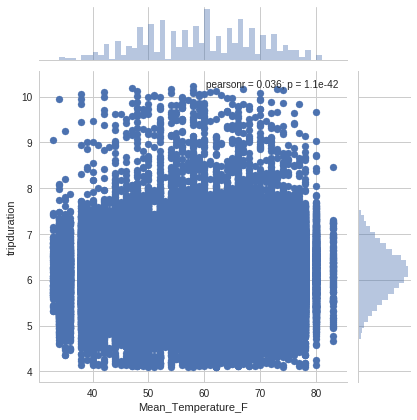

In [23]:
sns.jointplot(x=cs_lm_f.Mean_Temperature_F, y=np.log(cs_lm_t));

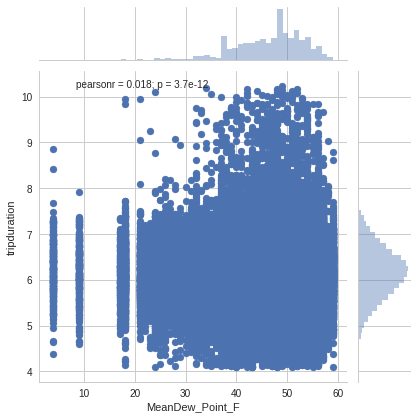

In [24]:
sns.jointplot(x=cs_lm_f.MeanDew_Point_F, y=np.log(cs_lm_t));

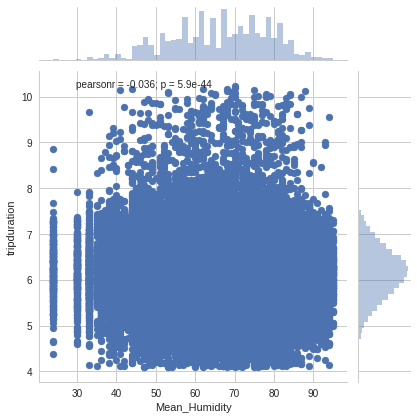

In [25]:
sns.jointplot(x=cs_lm_f.Mean_Humidity, y=np.log(cs_lm_t));

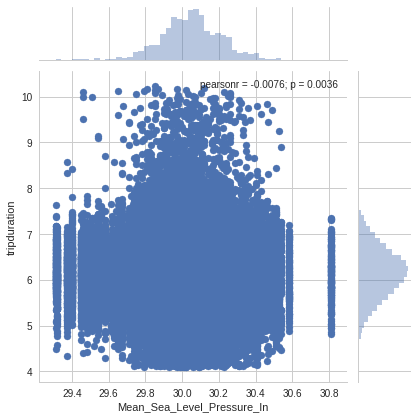

In [26]:
sns.jointplot(x=cs_lm_f.Mean_Sea_Level_Pressure_In, y=np.log(cs_lm_t));

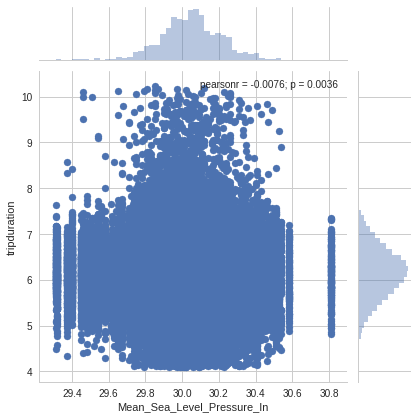

In [33]:
sns.jointplot(x=cs_lm_f.Mean_Sea_Level_Pressure_In, y=np.log(cs_lm_t));

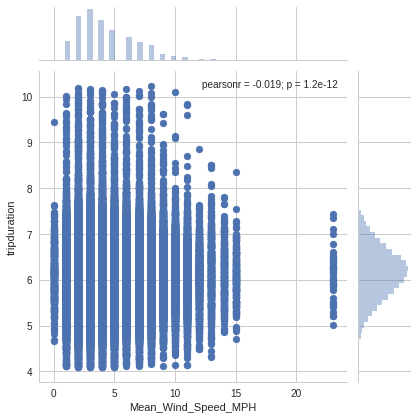

In [44]:
sns.jointplot(x=cs_lm_f.Mean_Wind_Speed_MPH, y=np.log(cs_lm_t));

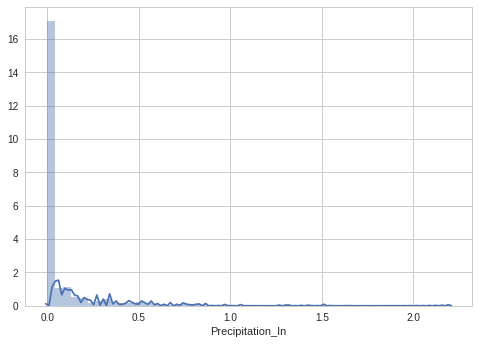

In [46]:
sns.distplot(cs_lm_f.Precipitation_In);

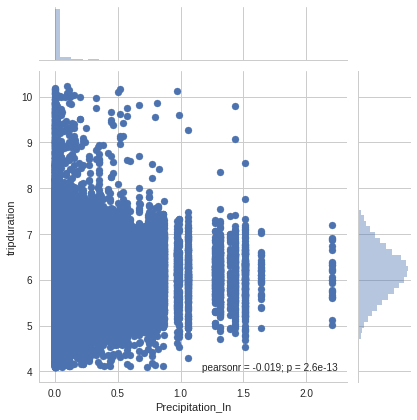

In [45]:
sns.jointplot(x=cs_lm_f.Precipitation_In, y=np.log(cs_lm_t));

In [69]:
cs_lm_corr = pd.concat([cs_lm_f[[u'age', u'Mean_Temperature_F', u'MeanDew_Point_F', u'Mean_Humidity',
                                u'Mean_Sea_Level_Pressure_In', u'Mean_Visibility_Miles',
                                u'Mean_Wind_Speed_MPH', u'Precipitation_In']], np.log(cs_lm_t)], axis = 1).corr()

In [70]:
cs_lm_corr[cs_lm_corr > 0.4]

,age,Mean_Temperature_F,MeanDew_Point_F,Mean_Humidity,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,tripduration
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean_Temperature_F,NaN,1.000000,0.798794,NaN,NaN,NaN,NaN,NaN,NaN
MeanDew_Point_F,NaN,0.798794,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Mean_Humidity,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.417928,NaN
Mean_Sea_Level_Pressure_In,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Mean_Visibility_Miles,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Mean_Wind_Speed_MPH,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Precipitation_In,NaN,NaN,NaN,0.417928,NaN,NaN,NaN,1.000000,NaN
tripduration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


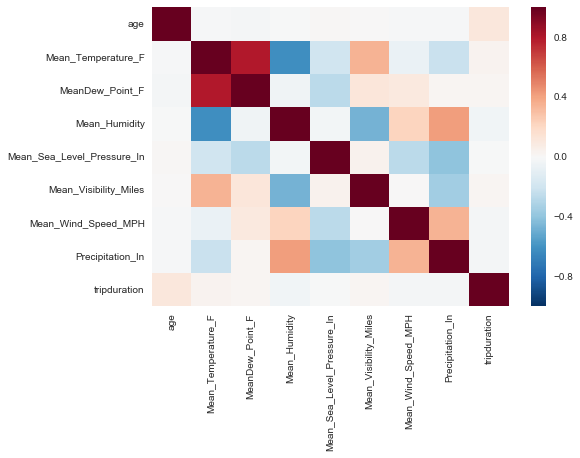

Wall time: 2.15 s


In [71]:
%%time
sns.heatmap(cs_lm_corr)
plt.show()

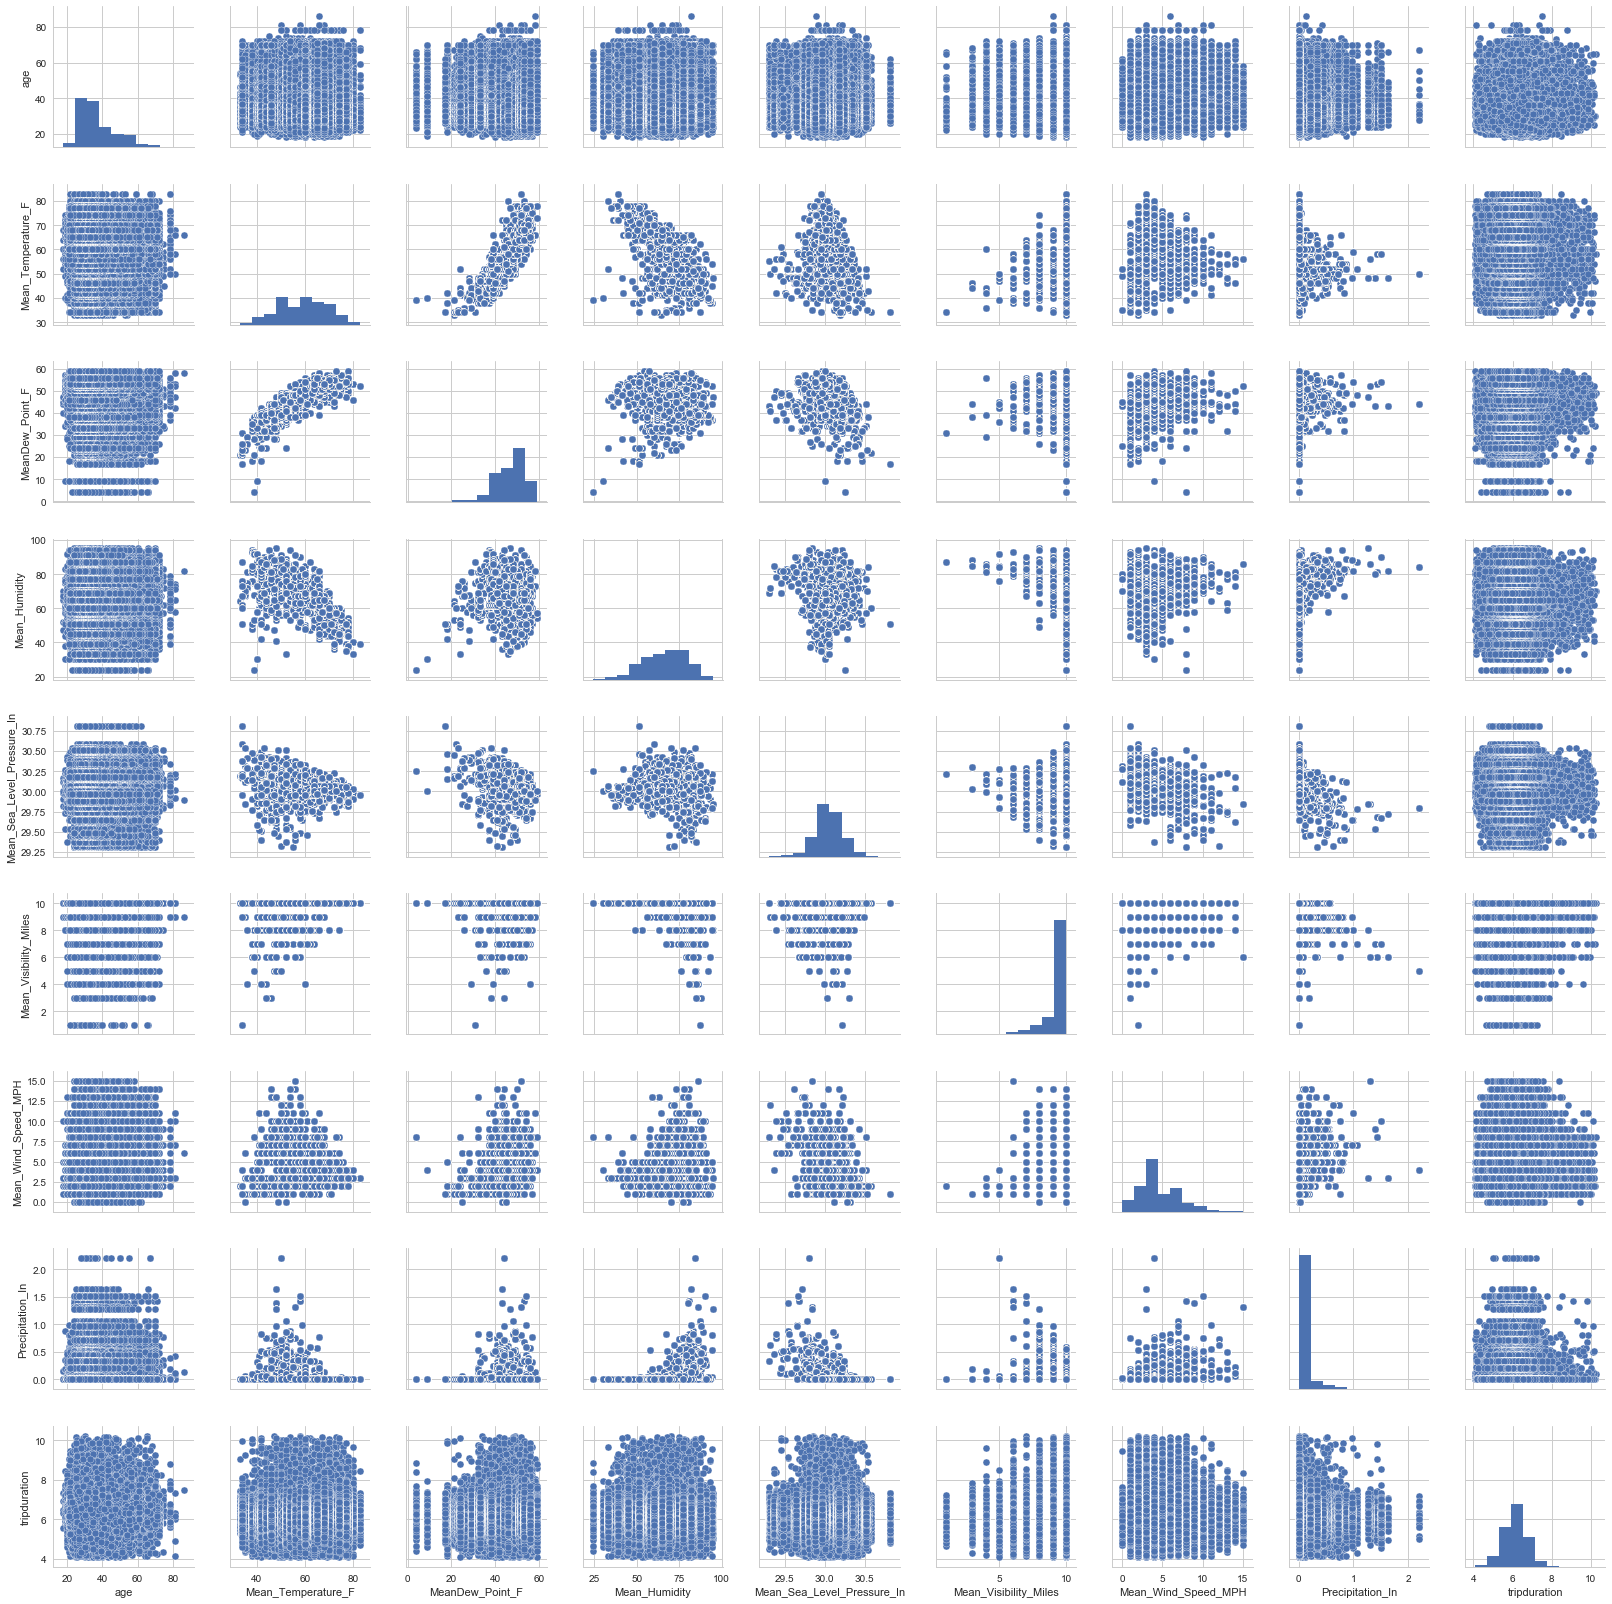

Wall time: 1min 47s


In [72]:
%%time
sns.pairplot(pd.concat([cs_lm_f[[u'age', u'Mean_Temperature_F', u'MeanDew_Point_F', u'Mean_Humidity',
                                u'Mean_Sea_Level_Pressure_In', u'Mean_Visibility_Miles',
                                u'Mean_Wind_Speed_MPH', u'Precipitation_In']], np.log(cs_lm_t)], axis = 1))
plt.show()

In [7]:
train_list = []
test_list = []
cs_lm_sscv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
for train_idx, test_idx in cs_lm_sscv.split(cs_lm_f):
    print('train_idx = ', train_idx, len(train_idx))
    print('test_idx = ', test_idx, len(test_idx))
    train_list.append(train_idx)
    test_list.append(test_idx)

train_idx =  [86076 54402 25803 ..., 93553 94735 83209] 102282
test_idx =  [ 11769  65988  32221 ..., 143063  91767  70028] 43836
train_idx =  [45774 71665 23405 ..., 40725  4771 92354] 102282
test_idx =  [135260  40971  20089 ...,  80156  64364  44389] 43836
train_idx =  [ 36314 111593  34122 ..., 111153  94305  97026] 102282
test_idx =  [12504 58805 74200 ...,  6306  1002 68125] 43836
train_idx =  [100194  62173  27292 ..., 117636  52788 106016] 102282
test_idx =  [ 59676  52438 142061 ...,  18236  56422  11519] 43836
train_idx =  [ 57244  94424  16425 ..., 114139  43437   7080] 102282
test_idx =  [ 20124  88207  87016 ..., 124803  65078 107735] 43836


In [8]:
cs_lm_fd0 = sm.OLS(np.log(cs_lm_t.iloc[train_list[0]]['tripduration']), 
                  sm.add_constant(cs_lm_f.iloc[train_list[0]]), missing='drop').fit()
cs_lm_fd1 = sm.OLS(np.log(cs_lm_t.iloc[train_list[1]]['tripduration']), 
                  sm.add_constant(cs_lm_f.iloc[train_list[1]]), missing='drop').fit()
cs_lm_fd2 = sm.OLS(np.log(cs_lm_t.iloc[train_list[2]]['tripduration']), 
                  sm.add_constant(cs_lm_f.iloc[train_list[2]]), missing='drop').fit()
cs_lm_fd3 = sm.OLS(np.log(cs_lm_t.iloc[train_list[3]]['tripduration']), 
                  sm.add_constant(cs_lm_f.iloc[train_list[3]]), missing='drop').fit()
cs_lm_fd4 = sm.OLS(np.log(cs_lm_t.iloc[train_list[4]]['tripduration']), 
                  sm.add_constant(cs_lm_f.iloc[train_list[4]]), missing='drop').fit()

In [9]:
upper_pv = list(cs_lm_fd0.pvalues[cs_lm_fd0.pvalues > 0.05].index)
upper_pv.extend(list(cs_lm_fd1.pvalues[cs_lm_fd1.pvalues > 0.05].index))
upper_pv.extend(list(cs_lm_fd2.pvalues[cs_lm_fd2.pvalues > 0.05].index))
upper_pv.extend(list(cs_lm_fd3.pvalues[cs_lm_fd3.pvalues > 0.05].index))
upper_pv.extend(list(cs_lm_fd4.pvalues[cs_lm_fd4.pvalues > 0.05].index))

In [10]:
collections.Counter(upper_pv)

Counter({'Fog': 5,
         'MeanDew_Point_F': 5,
         'Mean_Humidity': 5,
         'Mean_Sea_Level_Pressure_In': 1,
         'Mean_Temperature_F': 5,
         'Mean_Visibility_Miles': 5,
         'Precipitation_In': 5,
         'Rain': 2,
         'Snow': 5,
         'Thunderstorm': 5,
         'day': 1})

In [13]:
# majority를 가장 만족하는 모형 1
cs_lm_fd0.pvalues[cs_lm_fd0.pvalues > 0.05].index

Index([u'Mean_Temperature_F', u'MeanDew_Point_F', u'Mean_Humidity',
       u'Mean_Visibility_Miles', u'Precipitation_In', u'Snow', u'Fog',
       u'Thunderstorm'],
      dtype='object')

In [16]:
# majority를 가장 만족하는 모형 2
cs_lm_fd3.pvalues[cs_lm_fd3.pvalues > 0.05].index

Index([u'Mean_Temperature_F', u'MeanDew_Point_F', u'Mean_Humidity',
       u'Mean_Visibility_Miles', u'Precipitation_In', u'Snow', u'Fog',
       u'Thunderstorm'],
      dtype='object')

In [17]:
cs_lm_fd0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     281.6
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:50:06   Log-Likelihood:                -90583.
No. Observations:              102282   AIC:                         1.812e+05
Df Residuals:                  102253   BIC:                         1.815e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                          4.9337      0.268     18.435      0.000         4.409     5.458
age                            0.0046      0.000     24.869      0.000         0.004     0.005
Mean_Temperature_F             0.0006      0.001      0.454      0.650        -0.002     0.003
MeanDew_Point_F                0.0007      0.001      0.533      0.594        -0.002     0.003
Mean_Humidity                 -0.0006      0.001     -1.019      0.308        -0.002     0.001
Mean_Sea_Level_Pressure_In    -0.0265      0.012     -2.156      0.031        -0.051    -0.002
Mean_Visibility_Miles          0.0028      0.002      1.275      0.202        -0.002     0.007
Mean_Wind_Speed_MPH           -0.0019      0.001     -2.328      0.020        -0.004    -0.000
Precipitation_In              -0.0024      0.014     -0.176      0.860        -0.029     0.024
day                            0.0031      0.001      2.157      0.031         0.000     0.006
weekend                       -0.0706      0.007     -9.710      0.000        -0.085    -0.056
Gender_F                       1.7582      0.089     19.685      0.000         1.583     1.933
Gender_M                       1.5729      0.089     17.619      0.000         1.398     1.748
Gender_O                       1.6027      0.090     17.857      0.000         1.427     1.779
from_station_area[BT]          0.2400      0.022     11.082      0.000         0.198     0.282
from_station_area[CBD]         0.2959      0.022     13.751      0.000         0.254     0.338
from_station_area[CD]          0.3234      0.033      9.907      0.000         0.259     0.387
from_station_area[CH]          0.1494      0.021      7.089      0.000         0.108     0.191
from_station_area[DPD]         0.3187      0.023     13.653      0.000         0.273     0.364
from_station_area[EL]          0.5296      0.023     23.378      0.000         0.485     0.574
from_station_area[FH]          0.4270      0.023     18.559      0.000         0.382     0.472
from_station_area[ID]          0.6343      0.031     20.591      0.000         0.574     0.695
from_station_area[PS]          0.6125      0.023     26.702      0.000         0.568     0.658
from_station_area[SLU]         0.2587      0.021     12.208      0.000         0.217     0.300
from_station_area[UD]          0.3948      0.023     17.040      0.000         0.349     0.440
from_station_area[UW]          0.2595      0.023     11.451      0.000         0.215     0.304
from_station_area[WF]          0.4898      0.023     21.058      0.000         0.444     0.535
Rain                          -0.0131      0.005     -2.589      0.010        -0.023    -0.003
Snow                          -0.0076      0.031     -0.243      0.808        -0.069     0.054
Fog                           -0.0087      

In [18]:
cs_lm_fd3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:50:06   Log-Likelihood:                -90660.
No. Observations:              102282   AIC:                         1.814e+05
Df Residuals:                  102253   BIC:                         1.817e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                          4.9357      0.268     18.426      0.000         4.411     5.461
age                            0.0046      0.000     24.787      0.000         0.004     0.005
Mean_Temperature_F             0.0010      0.001      0.813      0.416        -0.001     0.003
MeanDew_Point_F                0.0006      0.001      0.451      0.652        -0.002     0.003
Mean_Humidity                 -0.0007      0.001     -1.074      0.283        -0.002     0.001
Mean_Sea_Level_Pressure_In    -0.0271      0.012     -2.205      0.027        -0.051    -0.003
Mean_Visibility_Miles          0.0021      0.002      0.939      0.348        -0.002     0.006
Mean_Wind_Speed_MPH           -0.0022      0.001     -2.684      0.007        -0.004    -0.001
Precipitation_In              -0.0094      0.013     -0.697      0.486        -0.036     0.017
day                            0.0042      0.001      2.957      0.003         0.001     0.007
weekend                       -0.0634      0.007     -8.734      0.000        -0.078    -0.049
Gender_F                       1.7533      0.089     19.610      0.000         1.578     1.929
Gender_M                       1.5710      0.089     17.579      0.000         1.396     1.746
Gender_O                       1.6115      0.090     17.943      0.000         1.435     1.788
from_station_area[BT]          0.2344      0.022     10.817      0.000         0.192     0.277
from_station_area[CBD]         0.2959      0.022     13.729      0.000         0.254     0.338
from_station_area[CD]          0.3667      0.033     11.143      0.000         0.302     0.431
from_station_area[CH]          0.1502      0.021      7.113      0.000         0.109     0.192
from_station_area[DPD]         0.3193      0.023     13.654      0.000         0.273     0.365
from_station_area[EL]          0.5249      0.023     23.153      0.000         0.480     0.569
from_station_area[FH]          0.4254      0.023     18.446      0.000         0.380     0.471
from_station_area[ID]          0.6080      0.032     19.226      0.000         0.546     0.670
from_station_area[PS]          0.6131      0.023     26.663      0.000         0.568     0.658
from_station_area[SLU]         0.2586      0.021     12.190      0.000         0.217     0.300
from_station_area[UD]          0.4063      0.023     17.537      0.000         0.361     0.452
from_station_area[UW]          0.2561      0.023     11.299      0.000         0.212     0.301
from_station_area[WF]          0.4768      0.023     20.448      0.000         0.431     0.522
Rain                          -0.0137      0.005     -2.697      0.007        -0.024    -0.004
Snow                          -0.0068      0.032     -0.214      0.831        -0.069     0.055
Fog                            0.0102      

In [14]:
# 잔차 정규분포 아님(Omnibus, Jarque-Bera)
# 자기상관 존재 X (Durbin-Watson)

In [100]:
bp0_name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp0_test = sms.het_breushpagan(cs_lm_fd0.resid, cs_lm_fd0.model.exog)
pprint(lzip(bp0_name, bp0_test))
# H_0 reject: h_1(Heteroskedasticity)

[('Lagrange multiplier statistic', 842.34699575504294),
 ('p-value', 8.0050701134820148e-158),
 ('f-value', 30.325034500116541),
 ('f p-value', 5.2209840902274573e-160)]


In [12]:
# fit하고자 하는 변수를 동일하게 하고자 함.
def linear_predict(X, w, feature_list):
    # X: input test data
    # w: coef ( fitted_model.params )
    # feature_list: feature list(or index) in pv <= 0.05 ( fitted_model.params.loc[fitted_model.pvalues <= 0.05].index )
    return(sm.add_constant(X)[feature_list].as_matrix().dot(w.loc[feature_list].as_matrix()))

In [13]:
cs_lm_fd0_pred = linear_predict(cs_lm_f.iloc[test_list[0]], 
                                cs_lm_fd0.params, 
                                cs_lm_fd3.params.loc[cs_lm_fd3.pvalues <= 0.05].index)
cs_lm_fd1_pred = linear_predict(cs_lm_f.iloc[test_list[1]], 
                                cs_lm_fd1.params, 
                                cs_lm_fd3.params.loc[cs_lm_fd3.pvalues <= 0.05].index)
cs_lm_fd2_pred = linear_predict(cs_lm_f.iloc[test_list[2]], 
                                cs_lm_fd2.params, 
                                cs_lm_fd3.params.loc[cs_lm_fd3.pvalues <= 0.05].index)
cs_lm_fd3_pred = linear_predict(cs_lm_f.iloc[test_list[3]], 
                                cs_lm_fd3.params, 
                                cs_lm_fd3.params.loc[cs_lm_fd3.pvalues <= 0.05].index)
cs_lm_fd4_pred = linear_predict(cs_lm_f.iloc[test_list[4]], 
                                cs_lm_fd4.params, 
                                cs_lm_fd3.params.loc[cs_lm_fd3.pvalues <= 0.05].index)

In [18]:
print(mean_absolute_error(cs_lm_t.iloc[train_list[0]], np.exp(cs_lm_fd0.predict())))
print(mean_absolute_error(cs_lm_t.iloc[train_list[1]], np.exp(cs_lm_fd1.predict())))
print(mean_absolute_error(cs_lm_t.iloc[train_list[2]], np.exp(cs_lm_fd2.predict())))
print(mean_absolute_error(cs_lm_t.iloc[train_list[3]], np.exp(cs_lm_fd3.predict())))
print(mean_absolute_error(cs_lm_t.iloc[train_list[4]], np.exp(cs_lm_fd4.predict())))

267.833166244
267.184515776
267.193043827
267.49389153
267.658362205


In [21]:
print(mean_absolute_error(cs_lm_t.iloc[test_list[0]], np.exp(cs_lm_fd0_pred)))
print(mean_absolute_error(cs_lm_t.iloc[test_list[1]], np.exp(cs_lm_fd1_pred)))
print(mean_absolute_error(cs_lm_t.iloc[test_list[2]], np.exp(cs_lm_fd2_pred)))
print(mean_absolute_error(cs_lm_t.iloc[test_list[3]], np.exp(cs_lm_fd3_pred)))
print(mean_absolute_error(cs_lm_t.iloc[test_list[4]], np.exp(cs_lm_fd4_pred)))

265.403777542
266.038276697
266.040761355
266.7982032
264.966670048


In [23]:
cs_lm1_f = cycle_share[cycle_share.usertype == 'Member'][['age', 'Mean_Sea_Level_Pressure_In', 'Mean_Wind_Speed_MPH',
                                                          'day', 'weekend', 'Gender_F', 'Gender_M', 'Gender_O', 
                                                          'from_station_area[BT]','from_station_area[CBD]', 
                                                          'from_station_area[CD]', 'from_station_area[CH]', 
                                                          'from_station_area[DPD]', 'from_station_area[EL]', 
                                                          'from_station_area[FH]', 'from_station_area[ID]', 
                                                          'from_station_area[PS]', 'from_station_area[SLU]', 
                                                          'from_station_area[UD]', 'from_station_area[UW]', 
                                                          'from_station_area[WF]', 'Rain']]
cs_lm1_f.reset_index(inplace = True)
del cs_lm1_f['index']

In [24]:
cs_lm1_t = cycle_share.tripduration[cycle_share.usertype == 'Member']
cs_lm1_t = cs_lm1_t.reset_index()
del cs_lm1_t['index']

In [25]:
# 잠시만...
cs_lm1_t = cs_lm1_t[~cs_lm1_f.age.isnull()]
cs_lm1_t.isnull().sum()

tripduration    0
dtype: int64

In [26]:
# 잠시만...
cs_lm1_f = cs_lm1_f[~cs_lm1_f.age.isnull()]
cs_lm1_f.isnull().sum()

age                           0
Mean_Sea_Level_Pressure_In    0
Mean_Wind_Speed_MPH           0
day                           0
weekend                       0
Gender_F                      0
Gender_M                      0
Gender_O                      0
from_station_area[BT]         0
from_station_area[CBD]        0
from_station_area[CD]         0
from_station_area[CH]         0
from_station_area[DPD]        0
from_station_area[EL]         0
from_station_area[FH]         0
from_station_area[ID]         0
from_station_area[PS]         0
from_station_area[SLU]        0
from_station_area[UD]         0
from_station_area[UW]         0
from_station_area[WF]         0
Rain                          0
dtype: int64

In [27]:
cs_lm1_train_list = []
cs_lm1_test_list = []
cs_lm1_sscv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
for train_idx, test_idx in cs_lm1_sscv.split(cs_lm1_f):
    print('train_idx = ', train_idx, len(train_idx))
    print('test_idx = ', test_idx, len(test_idx))
    cs_lm1_train_list.append(train_idx)
    cs_lm1_test_list.append(test_idx)

train_idx =  [ 37393  44718 126164 ...,  93553  94735  83209] 102314
test_idx =  [143206  65495  17587 ...,  32919  89350  36717] 43850
train_idx =  [143429  13939  64574 ...,  34354 119293 118037] 102314
test_idx =  [ 44575  85227  28428 ..., 145275  40205  40378] 43850
train_idx =  [134744 111587  53225 ...,  48221   4669  23803] 102314
test_idx =  [105828 110224  64872 ...,  90263  65538 104397] 43850
train_idx =  [ 47639 124395 121089 ...,   9368  70378  87500] 102314
test_idx =  [ 51587 108658  87661 ...,  46914 121179 129344] 43850
train_idx =  [ 64228  24751 140986 ..., 102707  16921  86244] 102314
test_idx =  [127851  19251  71989 ..., 136689  84354  78599] 43850


In [28]:
cs_lm1_fd0 = sm.OLS(np.log(cs_lm1_t.iloc[cs_lm1_train_list[0]]), 
                  sm.add_constant(cs_lm1_f.iloc[cs_lm1_train_list[0]]), missing='drop').fit()
cs_lm1_fd1 = sm.OLS(np.log(cs_lm1_t.iloc[cs_lm1_train_list[1]]), 
                  sm.add_constant(cs_lm1_f.iloc[cs_lm1_train_list[1]]), missing='drop').fit()
cs_lm1_fd2 = sm.OLS(np.log(cs_lm1_t.iloc[cs_lm1_train_list[2]]), 
                  sm.add_constant(cs_lm1_f.iloc[cs_lm1_train_list[2]]), missing='drop').fit()
cs_lm1_fd3 = sm.OLS(np.log(cs_lm1_t.iloc[cs_lm1_train_list[3]]), 
                  sm.add_constant(cs_lm1_f.iloc[cs_lm1_train_list[3]]), missing='drop').fit()
cs_lm1_fd4 = sm.OLS(np.log(cs_lm1_t.iloc[cs_lm1_train_list[4]]), 
                  sm.add_constant(cs_lm1_f.iloc[cs_lm1_train_list[4]]), missing='drop').fit()

In [97]:
cs_lm1_fd0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     395.1
Date:                Mon, 17 Apr 2017   Prob (F-statistic):               0.00
Time:                        22:09:55   Log-Likelihood:                -90485.
No. Observations:              102314   AIC:                         1.810e+05
Df Residuals:                  102293   BIC:                         1.812e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                          5.3717      0.234     22.924      0.000         4.912     5.831
age                            0.0046      0.000     24.779      0.000         0.004     0.005
Mean_Sea_Level_Pressure_In    -0.0448      0.011     -4.094      0.000        -0.066    -0.023
Mean_Wind_Speed_MPH           -0.0030      0.001     -3.792      0.000        -0.005    -0.001
day                            0.0031      0.001      2.208      0.027         0.000     0.006
weekend                       -0.0738      0.007    -10.202      0.000        -0.088    -0.060
Gender_F                       1.9050      0.078     24.347      0.000         1.752     2.058
Gender_M                       1.7182      0.078     21.974      0.000         1.565     1.871
Gender_O                       1.7485      0.079     22.217      0.000         1.594     1.903
from_station_area[BT]          0.2727      0.019     14.169      0.000         0.235     0.310
from_station_area[CBD]         0.3286      0.019     17.175      0.000         0.291     0.366
from_station_area[CD]          0.3675      0.031     11.762      0.000         0.306     0.429
from_station_area[CH]          0.1795      0.019      9.656      0.000         0.143     0.216
from_station_area[DPD]         0.3508      0.021     16.591      0.000         0.309     0.392
from_station_area[EL]          0.5570      0.020     27.330      0.000         0.517     0.597
from_station_area[FH]          0.4607      0.021     22.213      0.000         0.420     0.501
from_station_area[ID]          0.6601      0.029     22.596      0.000         0.603     0.717
from_station_area[PS]          0.6466      0.021     31.252      0.000         0.606     0.687
from_station_area[SLU]         0.2924      0.019     15.622      0.000         0.256     0.329
from_station_area[UD]          0.4339      0.021     20.724      0.000         0.393     0.475
from_station_area[UW]          0.2971      0.020     14.581      0.000         0.257     0.337
from_station_area[WF]          0.5249      0.021     25.097      0.000         0.484     0.566
Rain                          -0.0289      0.004     -7.048      0.000        -0.037    -0.021
==============================================================================
Omnibus:                     6235.225   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18506.190
Skew:                           0.306   Prob(JB):                         0.00
Kurtosis:                       4.991   Cond. No.                     6.77e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.3e-

In [101]:
bp1_name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp1_test = sms.het_breushpagan(cs_lm1_fd0.resid, cs_lm1_fd0.model.exog)
pprint(lzip(bp1_name, bp1_test))
# H_0 reject: h_1(이분산성)

[('Lagrange multiplier statistic', 848.92385366507483),
 ('p-value', 2.4405107209072346e-165),
 ('f-value', 42.79254057707513),
 ('f p-value', 1.0643299658406818e-167)]


In [102]:
upper_pv1 = list(cs_lm1_fd0.pvalues[cs_lm1_fd0.pvalues > 0.05].index)
upper_pv1.extend(list(cs_lm1_fd1.pvalues[cs_lm1_fd1.pvalues > 0.05].index))
upper_pv1.extend(list(cs_lm1_fd2.pvalues[cs_lm1_fd2.pvalues > 0.05].index))
upper_pv1.extend(list(cs_lm1_fd3.pvalues[cs_lm1_fd3.pvalues > 0.05].index))
upper_pv1.extend(list(cs_lm1_fd4.pvalues[cs_lm1_fd4.pvalues > 0.05].index))

In [103]:
collections.Counter(upper_pv1)

Counter({'day': 1})

In [31]:
cs_lm1_fd0_pred = linear_predict(cs_lm1_f.iloc[cs_lm1_test_list[0]], 
                                cs_lm1_fd0.params, 
                                cs_lm1_fd0.params.loc[cs_lm1_fd0.pvalues <= 0.05].index)
cs_lm1_fd1_pred = linear_predict(cs_lm1_f.iloc[cs_lm1_test_list[1]], 
                                cs_lm1_fd1.params, 
                                cs_lm1_fd0.params.loc[cs_lm1_fd0.pvalues <= 0.05].index)
cs_lm1_fd2_pred = linear_predict(cs_lm1_f.iloc[cs_lm1_test_list[2]], 
                                cs_lm1_fd2.params, 
                                cs_lm1_fd0.params.loc[cs_lm1_fd0.pvalues <= 0.05].index)
cs_lm1_fd3_pred = linear_predict(cs_lm1_f.iloc[cs_lm1_test_list[3]], 
                                cs_lm1_fd3.params, 
                                cs_lm1_fd0.params.loc[cs_lm1_fd0.pvalues <= 0.05].index)
cs_lm1_fd4_pred = linear_predict(cs_lm1_f.iloc[cs_lm1_test_list[4]], 
                                cs_lm1_fd4.params, 
                                cs_lm1_fd0.params.loc[cs_lm1_fd0.pvalues <= 0.05].index)

In [29]:
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_train_list[0]], np.exp(cs_lm1_fd0.predict())))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_train_list[1]], np.exp(cs_lm1_fd1.predict())))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_train_list[2]], np.exp(cs_lm1_fd2.predict())))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_train_list[3]], np.exp(cs_lm1_fd3.predict())))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_train_list[4]], np.exp(cs_lm1_fd4.predict())))

266.278718131
266.931487935
267.4097519
266.436075623
267.226630368


In [32]:
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_test_list[0]], np.exp(cs_lm1_fd0_pred)))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_test_list[1]], np.exp(cs_lm1_fd1_pred)))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_test_list[2]], np.exp(cs_lm1_fd2_pred)))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_test_list[3]], np.exp(cs_lm1_fd3_pred)))
print(mean_absolute_error(cs_lm1_t.iloc[cs_lm1_test_list[4]], np.exp(cs_lm1_fd4_pred)))

268.288813786
266.674167044
265.646275636
267.831874879
266.007138199


In [33]:
cs_lscv = LassoCV(cv = cs_lm_sscv,
                  random_state = 10).fit(cs_lm_f, np.log(cs_lm_t))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
cs_lscv.alpha_

0.00068578132181214193

In [35]:
%%time
cs_ada_lslm_fd0 = AdaBoostRegressor(Lasso(alpha=cs_lscv.alpha_, 
                                          fit_intercept=True,  
                                          random_state = 10), 
                                    random_state = 10).fit(cs_lm_f.iloc[train_list[0]],
                                                           np.log(cs_lm_t.iloc[train_list[0]]))
cs_ada_lslm_fd1 = AdaBoostRegressor(Lasso(alpha=cs_lscv.alpha_, 
                                          fit_intercept=True,  
                                          random_state = 10), 
                                    random_state = 10).fit(cs_lm_f.iloc[train_list[1]],
                                                           np.log(cs_lm_t.iloc[train_list[1]]))
cs_ada_lslm_fd2 = AdaBoostRegressor(Lasso(alpha=cs_lscv.alpha_, 
                                          fit_intercept=True,  
                                          random_state = 10), 
                                    random_state = 10).fit(cs_lm_f.iloc[train_list[2]],
                                                           np.log(cs_lm_t.iloc[train_list[2]]))
cs_ada_lslm_fd3 = AdaBoostRegressor(Lasso(alpha=cs_lscv.alpha_, 
                                          fit_intercept=True,  
                                          random_state = 10), 
                                    random_state = 10).fit(cs_lm_f.iloc[train_list[3]],
                                                           np.log(cs_lm_t.iloc[train_list[3]]))
cs_ada_lslm_fd4 = AdaBoostRegressor(Lasso(alpha=cs_lscv.alpha_, 
                                          fit_intercept=True,  
                                          random_state = 10), 
                                    random_state = 10).fit(cs_lm_f.iloc[train_list[4]],
                                                           np.log(cs_lm_t.iloc[train_list[4]]))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 2min 12s


In [36]:
lasso_ex0 = Lasso(alpha=cs_lscv.alpha_, fit_intercept=True, random_state = 10).fit(cs_lm_f.iloc[train_list[0]], np.log(cs_lm_t.iloc[train_list[0]]))   

In [37]:
pd.concat([pd.DataFrame(lasso_ex0.intercept_, index = ['intercept'] ,columns=['coef']),
           pd.DataFrame(lasso_ex0.coef_, index = cs_lm_f.iloc[train_list[0]].columns ,columns=['coef'])])

,coef
intercept,6.053279
age,0.004730
Mean_Temperature_F,0.001122
MeanDew_Point_F,0.000305
Mean_Humidity,-0.000565
Mean_Sea_Level_Pressure_In,-0.000000
Mean_Visibility_Miles,0.002426
Mean_Wind_Speed_MPH,-0.001658
Precipitation_In,0.000000
day,0.004211


In [39]:
print(mean_absolute_error(cs_lm_t.iloc[train_list[0]], 
                          np.exp(cs_ada_lslm_fd0.predict(cs_lm_f.iloc[train_list[0]]))))
print(mean_absolute_error(cs_lm_t.iloc[train_list[1]], 
                          np.exp(cs_ada_lslm_fd1.predict(cs_lm_f.iloc[train_list[1]]))))
print(mean_absolute_error(cs_lm_t.iloc[train_list[2]], 
                          np.exp(cs_ada_lslm_fd2.predict(cs_lm_f.iloc[train_list[2]]))))
print(mean_absolute_error(cs_lm_t.iloc[train_list[3]], 
                          np.exp(cs_ada_lslm_fd3.predict(cs_lm_f.iloc[train_list[3]]))))
print(mean_absolute_error(cs_lm_t.iloc[train_list[4]], 
                          np.exp(cs_ada_lslm_fd4.predict(cs_lm_f.iloc[train_list[4]]))))     

272.833252604
270.841433182
271.690152947
271.646223348
271.759534276


In [40]:
print(mean_absolute_error(cs_lm_t.iloc[test_list[0]], 
                          np.exp(cs_ada_lslm_fd0.predict(cs_lm_f.iloc[test_list[0]]))))
print(mean_absolute_error(cs_lm_t.iloc[test_list[1]], 
                          np.exp(cs_ada_lslm_fd1.predict(cs_lm_f.iloc[test_list[1]]))))
print(mean_absolute_error(cs_lm_t.iloc[test_list[2]], 
                          np.exp(cs_ada_lslm_fd2.predict(cs_lm_f.iloc[test_list[2]]))))
print(mean_absolute_error(cs_lm_t.iloc[test_list[3]], 
                          np.exp(cs_ada_lslm_fd3.predict(cs_lm_f.iloc[test_list[3]]))))
print(mean_absolute_error(cs_lm_t.iloc[test_list[4]], 
                          np.exp(cs_ada_lslm_fd4.predict(cs_lm_f.iloc[test_list[4]]))))    

269.37985139
269.666452156
270.342678831
268.915471182
269.023682032
